In [29]:
import pandas as pd   
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt              
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [30]:
#load data set
df=pd.read_csv('titanic.csv')

In [31]:
#display the first six rows
df.head(6)
#from tail
df.tail(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [32]:
#Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [33]:
#View the description of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [34]:
#view the missing values
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [35]:
#fill the missing age values
df['Age'].fillna(df['Age'].median(),inplace=True)

df['Embarked'].fillna(df["Embarked"].mode()[0],inplace=True)
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [36]:
#drop cabin column
df.drop(columns=['Cabin'],inplace=True)


In [37]:
#check for the missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [38]:
#map the gender in to male->1 and female->0
df['Gender'] = df['Gender'].map({'male':1,'female':0})

In [39]:
#create a new features called familySize
df['FamilySize']=df['SibSp']+df['Parch']+1

In [40]:
#create a new features call isAlone
#indicates the is passader is alone or not
df['IsAlone'] =1 #initialize to 1
df['IsAlone'].loc[df['FamilySize']>1] =0  #set to 0 if familysize>1

C:\Users\Acer\AppData\Local\Temp\ipykernel_25792\489246123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize']>1] =0  #set to 0 if familysize>1


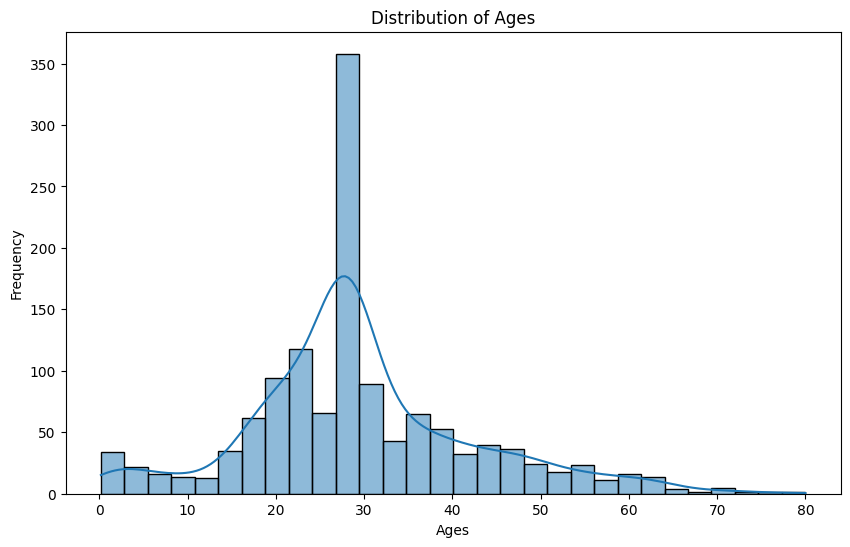

In [41]:
#visualization of distribution of Ages
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Distribution of Ages")
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.show()


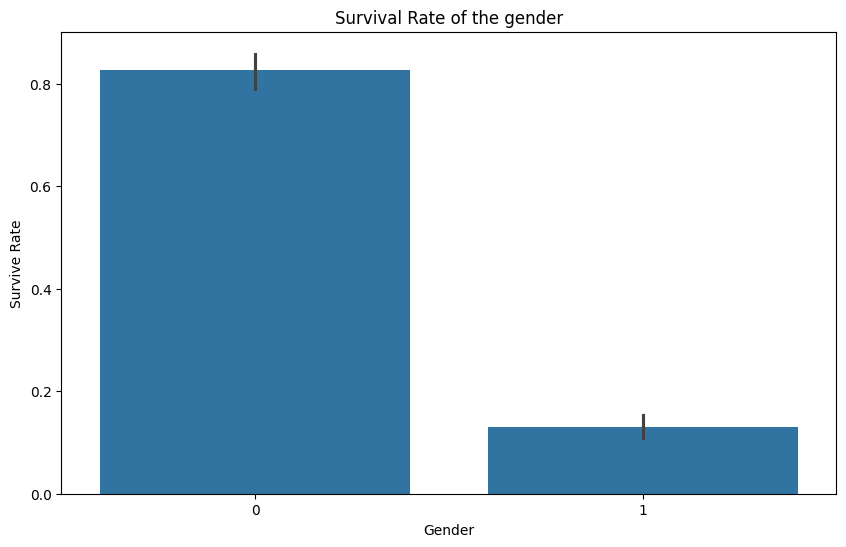

In [42]:
#plot the survival rate by gender
plt.figure(figsize=(10,6))
sns.barplot(x="Gender",y="Survived",data=df)
plt.title('Survival Rate of the gender')
plt.xlabel("Gender")
plt.ylabel('Survive Rate')
plt.show()

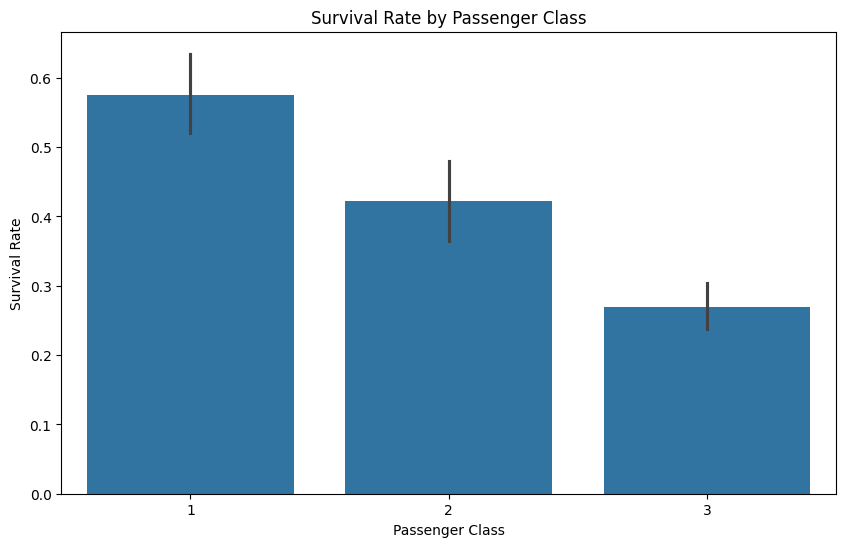

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived',data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel("Survival Rate")
plt.show()

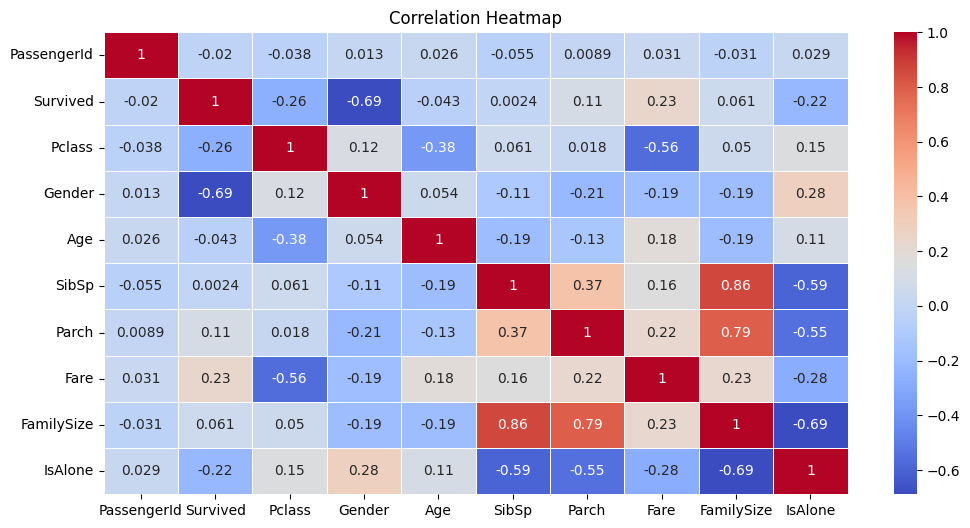

In [44]:
#correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,6))
# corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [45]:
#final touches
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], 
labels=['0-12', '13-20', '21-40', '41-60', '61-80'])

#Convert categorical features in to numerical code

df["AgeGroup"] = df['AgeGroup'].astype('category').cat.codes        
df['Embarked'] = df["Embarked"].astype('category').cat.codes        


In [46]:
features = ['Pclass','Gender','AgeGroup','Fare','FamilySize','IsAlone']
X_df = df[features]
y_df = df['Survived'] 

In [47]:
print("X_df shape:", X_df.shape)  # Should match the number of rows in df
print("y_df shape:", y_df.shape) 

X_df shape: (1309, 6)
y_df shape: (1309,)


In [48]:
# Check for missing values
print("Missing values in X_df:", X_df.isnull().sum())
print("Missing values in y_df:", y_df.isnull().sum())

Missing values in X_df: Pclass        0
Gender        0
AgeGroup      0
Fare          0
FamilySize    0
IsAlone       0
dtype: int64
Missing values in y_df: 0


In [49]:
#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=42)

In [50]:
X_train.shape,y_train.shape

((1047, 6), (1047,))

In [51]:
X_test.shape,y_test.shape

((262, 6), (262,))

In [52]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [53]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train_n,y_train)
y_preds = rfc.predict(X_test_n)

In [55]:
print("Accuracy is:",accuracy_score(y_test,y_preds)*100)


Accuracy is: 83.58778625954199


<Figure size 1000x700 with 0 Axes>

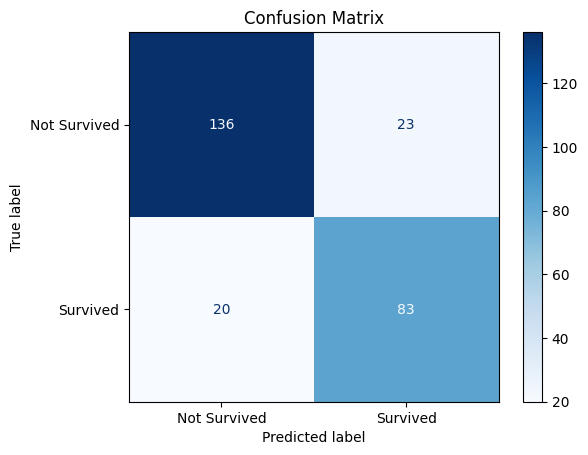

In [56]:
cm=confusion_matrix(y_test,y_preds)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Not Survived','Survived'])

plt.figure(figsize=(10,7))
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Lab task:-- #GridsearchCV in sklearn ,using best hyperparameter in machine learning model